In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import glob
import random
import base64

from PIL import Image
from io import BytesIO
from IPython.display import HTML
import requests
from IPython.display import IFrame

#Import all the necessary libraries to work on our database to clean-up columns, standarsize and create our model. 

## Upload the file

In [2]:
#Open the file "fifa21_male2.csv" that we want to use to work on our model.  

df=pd.read_csv("fifa21_male2.csv")

pd.set_option('display.max_columns', None)
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [3]:
df.shape

#Loading shape of the data to have an understanding of the data with numbers of columns and rows 

(17125, 107)

In [4]:
df.describe()

#using the describe() method check all the numericals columns to check mean, max, min and
#have a better understanding on which columns to choose for our model. 

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17118.000000,17118.000000,17067.000000,17125.000000,16702.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,60.507620,45.005742,266.607591,57.846423,49.574676,44.387270,54.324321,60.642803,322.693664,65.445898,65.443036,64.602273,62.924847,64.715591,302.414774,59.711416,65.170212,63.309606,65.308555,49.135708,261.922803,56.997839,47.085582,52.372766,55.443605,50.251445,59.940965,141.469898,47.246949,48.279358,46.099725,77.609693,15.600467,15.484672,15.472058,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,13.960635,17.729483,76.809344,18.047250,18.188344,17.504128,14.856911,15.873647,54.933593,14.657889,14.437377,14.372443,9.037279,14.031563,49.380576,13.417931,11.918063,15.313272,12.627212,19.044862,62.913935,17.021619,20.846705,19.094432,13.730080,15.696363,11.751111,61.595180,20.182548,21.483597,21.185154,81.136603,16.828637,16.143679,15.997328,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,7.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,12.000000,11.000000,14.000000,24.000000,17.000000,128.000000,12.000000,22.000000,11.000000,16.000000,4.000000,50.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,17.000000,3.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,294.000000,58.000000,59.000000,57.000000,57.000000,57.000000,272.000000,50.000000,58.000000,56.000000,58.000000,35.000000,235.000000,45.000000,26.000000,43.000000,47.000000,40.000000,53.000000,84.000000,29.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,63.000000,46.000000,279.000000,63.000000,51.000000,43.000000,57.000000,64.000000,331.000000,68.000000,68.000000,67.000000,63.000000,67.000000,308.000000,61.000000,66.000000,66.000000,67.000000,53.000000,269.000000,60.000000,53.000000,57.000000,57.000000,51.000000,61.000000,158.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66

In [5]:
df.columns[df.isna().any()].tolist()

#Check all the columns with NaN value and list them to help us identify the ones that we want to isolate from our analysis

['Club',
 'Position',
 'Club Logo',
 'Joined',
 'Loan Date End',
 'Volleys',
 'Curve',
 'Agility',
 'Balance',
 'Jumping',
 'Interceptions',
 'Positioning',
 'Vision',
 'Composure',
 'Sliding Tackle',
 'A/W',
 'D/W']

In [6]:
df.info(verbose=True,show_counts=True)

#we load the function info with all the parameters to have a quick overview of the data set, 
#and see which columns have integer/object(String) and total empty rows. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    ID                17125 non-null  int64  
 1    Name              17125 non-null  object 
 2    Age               17125 non-null  int64  
 3    OVA               17125 non-null  int64  
 4    Nationality       17125 non-null  object 
 5    Club              17102 non-null  object 
 6    BOV               17125 non-null  int64  
 7    BP                17125 non-null  object 
 8    Position          16712 non-null  object 
 9    Player Photo      17125 non-null  object 
 10   Club Logo         17102 non-null  object 
 11   Flag Photo        17125 non-null  object 
 12   POT               17125 non-null  int64  
 13   Team & Contract   17125 non-null  object 
 14   Height            17125 non-null  object 
 15   Weight            17125 non-null  object 
 16   foot              17

In [7]:
df.columns[df.isna().any()].tolist()

['Club',
 'Position',
 'Club Logo',
 'Joined',
 'Loan Date End',
 'Volleys',
 'Curve',
 'Agility',
 'Balance',
 'Jumping',
 'Interceptions',
 'Positioning',
 'Vision',
 'Composure',
 'Sliding Tackle',
 'A/W',
 'D/W']

In [8]:
df_filter = df[['ID','Age','OVA','BP','POT','foot','Value','Wage','Release Clause','Base Stats','Total Stats','Aggression','Reactions','Interceptions','Sliding Tackle','Defending']]
df_filter.head()

#we have created a new table "df_filter" with the selected columns withing the original data base
#for our model "Market value" because we found them to have the most accurate data to represent each player. 

,ID,Age,OVA,BP,POT,foot,Value,Wage,Release Clause,Base Stats,Total Stats,Aggression,Reactions,Interceptions,Sliding Tackle,Defending
0,2,33,69,LWB,69,Left,€625K,€7K,€0,408,1929,72,69,69.0,69.0,208
1,16,37,71,CM,71,Right,€600K,€7K,€1.1M,385,1906,71,65,71.0,40.0,153
2,27,33,71,CAM,71,Right,€1.1M,€15K,€0,354,1770,69,59,39.0,30.0,99
3,36,36,68,ST,82,Right,€0,€0,€0,369,1348,59,55,70.0,NaN,75
4,41,36,81,CAM,81,Right,€5.5M,€12K,€7.2M,420,2014,58,75,70.0,56.0,181


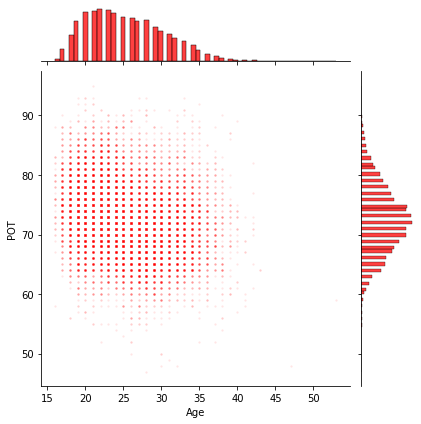

In [9]:
sns.jointplot(x=df_filter['Age'],y=df_filter['POT'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

#Create a joinplot with the Age(x axis) and Pot(y axis) 

In [10]:
df_filter['foot_binary'] = pd.get_dummies(df_filter['foot'],drop_first=True)
df_filter = df_filter.drop(columns=["foot"])
df_filter.head()

#We have added a new column "foot_binary" to convert the column foot string  Left foot = 0 & Right foot = 1 to
#be able to work with integer values for this column that will be part of our model. 

,ID,Age,OVA,BP,POT,Value,Wage,Release Clause,Base Stats,Total Stats,Aggression,Reactions,Interceptions,Sliding Tackle,Defending,foot_binary
0,2,33,69,LWB,69,€625K,€7K,€0,408,1929,72,69,69.0,69.0,208,0
1,16,37,71,CM,71,€600K,€7K,€1.1M,385,1906,71,65,71.0,40.0,153,1
2,27,33,71,CAM,71,€1.1M,€15K,€0,354,1770,69,59,39.0,30.0,99,1
3,36,36,68,ST,82,€0,€0,€0,369,1348,59,55,70.0,NaN,75,1
4,41,36,81,CAM,81,€5.5M,€12K,€7.2M,420,2014,58,75,70.0,56.0,181,1


In [11]:
# df_filter['foot_binary']=df_filter['foot_binary'].replace("€","")

In [12]:
def units(col):
    if "M" in col:
        return "1"
    elif "K" in col:
        return "1000"
    else:
        return "1"

#We have created a function "units" with a if/elif/ to basically detect within the string, "M", "K" 
#to return 1 and thousand for 1000

In [13]:
df_filter["Dummy_units_Value"] = df_filter["Value"].apply(units)
df_filter["Dummy_units_Wage"] = df_filter["Wage"].apply(units)
df_filter["Dummy_units_Release Clause"] = df_filter["Release Clause"].apply(units)
df_filter.head()

#Create the new column "Dummy_Units" , "Dummy_units_Wage", "Dummy_units_Release Clause"
#applying the function "units" we have just created

,ID,Age,OVA,BP,POT,Value,Wage,Release Clause,Base Stats,Total Stats,Aggression,Reactions,Interceptions,Sliding Tackle,Defending,foot_binary,Dummy_units_Value,Dummy_units_Wage,Dummy_units_Release Clause
0,2,33,69,LWB,69,€625K,€7K,€0,408,1929,72,69,69.0,69.0,208,0,1000,1000,1
1,16,37,71,CM,71,€600K,€7K,€1.1M,385,1906,71,65,71.0,40.0,153,1,1000,1000,1
2,27,33,71,CAM,71,€1.1M,€15K,€0,354,1770,69,59,39.0,30.0,99,1,1,1000,1
3,36,36,68,ST,82,€0,€0,€0,369,1348,59,55,70.0,NaN,75,1,1,1,1
4,41,36,81,CAM,81,€5.5M,€12K,€7.2M,420,2014,58,75,70.0,56.0,181,1,1,1000,1


In [14]:
df_filter['Value']=df_filter['Value'].str.replace('[K,k,M,m, €]','')
df_filter['Wage']=df_filter['Wage'].str.replace('[K,k,M,m, €]','')
df_filter['Release Clause']=df_filter['Release Clause'].str.replace('[K,k,M,m, €]','')
df_filter.head()

#We have filtered every rows of our selected columns to replace the following caracters: K,k,M,m, € to empty value to
#avoid any error, working on the columns. 

,ID,Age,OVA,BP,POT,Value,Wage,Release Clause,Base Stats,Total Stats,Aggression,Reactions,Interceptions,Sliding Tackle,Defending,foot_binary,Dummy_units_Value,Dummy_units_Wage,Dummy_units_Release Clause
0,2,33,69,LWB,69,625,7,0,408,1929,72,69,69.0,69.0,208,0,1000,1000,1
1,16,37,71,CM,71,600,7,1.1,385,1906,71,65,71.0,40.0,153,1,1000,1000,1
2,27,33,71,CAM,71,1.1,15,0,354,1770,69,59,39.0,30.0,99,1,1,1000,1
3,36,36,68,ST,82,0,0,0,369,1348,59,55,70.0,NaN,75,1,1,1,1
4,41,36,81,CAM,81,5.5,12,7.2,420,2014,58,75,70.0,56.0,181,1,1,1000,1


In [15]:
df_filter['Value'] = df_filter['Value'].astype(float)
df_filter['Wage'] = df_filter['Wage'].astype(float)
df_filter['Release Clause'] = df_filter['Release Clause'].astype(float)

df_filter['Dummy_units_Value'] = df_filter['Dummy_units_Value'].astype(float)
df_filter['Dummy_units_Wage'] = df_filter['Dummy_units_Wage'].astype(float)
df_filter['Dummy_units_Release Clause'] = df_filter['Dummy_units_Release Clause'].astype(float)
df_filter.dtypes

#We convert back all the column to float to make sure we can work with the columns correctly.

ID                              int64
Age                             int64
OVA                             int64
BP                             object
POT                             int64
Value                         float64
Wage                          float64
Release Clause                float64
Base Stats                      int64
Total Stats                     int64
Aggression                      int64
Reactions                       int64
Interceptions                 float64
Sliding Tackle                float64
Defending                       int64
foot_binary                     uint8
Dummy_units_Value             float64
Dummy_units_Wage              float64
Dummy_units_Release Clause    float64
dtype: object

In [16]:
df_filter['Value'] = df_filter['Value'] / df_filter['Dummy_units_Value']
# df_filter['Wage'] = df_filter['Wage'] / df_filter['Dummy_units_Wage']
df_filter['Release Clause'] = df_filter['Release Clause'] / df_filter['Dummy_units_Release Clause']

df_filter.head()

#We have overwritted the columns, dividing the current value, wage and release claude 
#to the related new columns we have just created above to align with same rank of value.

,ID,Age,OVA,BP,POT,Value,Wage,Release Clause,Base Stats,Total Stats,Aggression,Reactions,Interceptions,Sliding Tackle,Defending,foot_binary,Dummy_units_Value,Dummy_units_Wage,Dummy_units_Release Clause
0,2,33,69,LWB,69,0.625,7.0,0.0,408,1929,72,69,69.0,69.0,208,0,1000.0,1000.0,1.0
1,16,37,71,CM,71,0.600,7.0,1.1,385,1906,71,65,71.0,40.0,153,1,1000.0,1000.0,1.0
2,27,33,71,CAM,71,1.100,15.0,0.0,354,1770,69,59,39.0,30.0,99,1,1.0,1000.0,1.0
3,36,36,68,ST,82,0.000,0.0,0.0,369,1348,59,55,70.0,NaN,75,1,1.0,1.0,1.0
4,41,36,81,CAM,81,5.500,12.0,7.2,420,2014,58,75,70.0,56.0,181,1,1.0,1000.0,1.0


In [17]:
# I am merging the new data to the df_filter, which has been processed to show the value and money related parameters in the same monetary unit (millions)
# I take the player data with the columns to add the pictures and personal data of the players
df_player_data = df[['ID','Name',"Nationality",'Club','BP','Player Photo','foot','Club Logo','Flag Photo','Team & Contract']]
df_player_data.head()

data_ranking = pd.merge(left = df_player_data,
                           right = df_filter,
                           left_on = 'ID',
                           right_on = 'ID',
                           how = 'left'
)
display(data_ranking.shape)
data_ranking.head()

(17125, 28)

,ID,Name,Nationality,Club,BP_x,Player Photo,foot,Club Logo,Flag Photo,Team & Contract,Age,OVA,BP_y,POT,Value,Wage,Release Clause,Base Stats,Total Stats,Aggression,Reactions,Interceptions,Sliding Tackle,Defending,foot_binary,Dummy_units_Value,Dummy_units_Wage,Dummy_units_Release Clause
0,2,G. Pasquale,Italy,Udinese,LWB,https://cdn.sofifa.com/players/000/002/16_120.png,Left,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,33,69,LWB,69,0.625,7.0,0.0,408,1929,72,69,69.0,69.0,208,0,1000.0,1000.0,1.0
1,16,Luis García,Spain,KAS Eupen,CM,https://cdn.sofifa.com/players/000/016/19_120.png,Right,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,37,71,CM,71,0.600,7.0,1.1,385,1906,71,65,71.0,40.0,153,1,1000.0,1000.0,1.0
2,27,J. Cole,England,Coventry City,CAM,https://cdn.sofifa.com/players/000/027/16_120.png,Right,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,33,71,CAM,71,1.100,15.0,0.0,354,1770,69,59,39.0,30.0,99,1,1.0,1000.0,1.0
3,36,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,https://cdn.sofifa.com/players/000/036/09_120.png,Right,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,36,68,ST,82,0.000,0.0,0.0,369,1348,59,55,70.0,NaN,75,1,1.0,1.0,1.0
4,41,Iniesta,Spain,Vissel Kobe,CAM,https://cdn.sofifa.com/players/000/041/20_120.png,Right,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,36,81,CAM,81,5.500,12.0,7.2,420,2014,58,75,70.0,56.0,181,1,1.0,1000.0,1.0


In [18]:
# I create a function to return the url links provided within the dataset into html links, which shall allow us to display them both on the notebook and on a website
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

In [19]:
# Since there were some empty values on the column Club Logo, which are considered as float, we have decided to fill them with a string.
data_ranking["Club Logo"]=data_ranking["Club Logo"].fillna(value="no_picture")
data_ranking.head()

,ID,Name,Nationality,Club,BP_x,Player Photo,foot,Club Logo,Flag Photo,Team & Contract,Age,OVA,BP_y,POT,Value,Wage,Release Clause,Base Stats,Total Stats,Aggression,Reactions,Interceptions,Sliding Tackle,Defending,foot_binary,Dummy_units_Value,Dummy_units_Wage,Dummy_units_Release Clause
0,2,G. Pasquale,Italy,Udinese,LWB,https://cdn.sofifa.com/players/000/002/16_120.png,Left,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,33,69,LWB,69,0.625,7.0,0.0,408,1929,72,69,69.0,69.0,208,0,1000.0,1000.0,1.0
1,16,Luis García,Spain,KAS Eupen,CM,https://cdn.sofifa.com/players/000/016/19_120.png,Right,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,37,71,CM,71,0.600,7.0,1.1,385,1906,71,65,71.0,40.0,153,1,1000.0,1000.0,1.0
2,27,J. Cole,England,Coventry City,CAM,https://cdn.sofifa.com/players/000/027/16_120.png,Right,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,33,71,CAM,71,1.100,15.0,0.0,354,1770,69,59,39.0,30.0,99,1,1.0,1000.0,1.0
3,36,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,https://cdn.sofifa.com/players/000/036/09_120.png,Right,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,36,68,ST,82,0.000,0.0,0.0,369,1348,59,55,70.0,NaN,75,1,1.0,1.0,1.0
4,41,Iniesta,Spain,Vissel Kobe,CAM,https://cdn.sofifa.com/players/000/041/20_120.png,Right,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,36,81,CAM,81,5.500,12.0,7.2,420,2014,58,75,70.0,56.0,181,1,1.0,1000.0,1.0


In [20]:
# We apply the function to the 3 columns containing pictures within the dataset:
data_ranking["render_player"] = data_ranking["Player Photo"].apply(path_to_image_html)
data_ranking["render_club"] = data_ranking["Club Logo"].apply(path_to_image_html)
data_ranking["render_flag_photo"] = data_ranking["Flag Photo"].apply(path_to_image_html)

In [21]:
#We sort the ranking table in descending order by the column value, in order to get the highest valued player at the top:

data_ranking = data_ranking.sort_values(by=["Value"],ascending=False).reset_index()
data_ranking.head()

,index,ID,Name,Nationality,Club,BP_x,Player Photo,foot,Club Logo,Flag Photo,Team & Contract,Age,OVA,BP_y,POT,Value,Wage,Release Clause,Base Stats,Total Stats,Aggression,Reactions,Interceptions,Sliding Tackle,Defending,foot_binary,Dummy_units_Value,Dummy_units_Wage,Dummy_units_Release Clause,render_player,render_club,render_flag_photo
0,9331,231747,K. Mbappé,France,Paris Saint-Germain,ST,https://cdn.sofifa.com/players/231/747/20_120.png,Right,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/fr.png,Paris Saint-Germain 2018 ~ 2022,21,90,ST,95,105.5,160.0,203.1,466,2147,62,92,38.0,32.0,100,1,1.0,1000.0,1.0,"<img src=""https://cdn.sofifa.com/players/231/7...","<img src=""https://cdn.sofifa.com/teams/73/ligh...","<img src=""https://cdn.sofifa.com/flags/fr.png""..."
1,2650,190871,Neymar Jr,Brazil,Paris Saint-Germain,LW,https://cdn.sofifa.com/players/190/871/20_120.png,Right,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/br.png,Paris Saint-Germain 2017 ~ 2022,28,91,LW,91,90.0,270.0,166.5,451,2175,51,91,36.0,29.0,94,1,1.0,1000.0,1.0,"<img src=""https://cdn.sofifa.com/players/190/8...","<img src=""https://cdn.sofifa.com/teams/73/ligh...","<img src=""https://cdn.sofifa.com/flags/br.png""..."
2,2871,192985,K. De Bruyne,Belgium,Manchester City,CAM,https://cdn.sofifa.com/players/192/985/20_120.png,Right,https://cdn.sofifa.com/teams/10/light_60.png,https://cdn.sofifa.com/flags/be.png,Manchester City 2015 ~ 2023,29,91,CAM,91,87.0,370.0,161.0,485,2304,76,91,66.0,53.0,186,1,1.0,1000.0,1.0,"<img src=""https://cdn.sofifa.com/players/192/9...","<img src=""https://cdn.sofifa.com/teams/10/ligh...","<img src=""https://cdn.sofifa.com/flags/be.png""..."
3,2287,188545,R. Lewandowski,Poland,FC Bayern München,ST,https://cdn.sofifa.com/players/188/545/20_120.png,Right,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/pl.png,FC Bayern München 2014 ~ 2023,31,91,ST,91,80.0,240.0,132.0,457,2195,81,93,49.0,19.0,96,1,1.0,1000.0,1.0,"<img src=""https://cdn.sofifa.com/players/188/5...","<img src=""https://cdn.sofifa.com/teams/21/ligh...","<img src=""https://cdn.sofifa.com/flags/pl.png""..."
4,5030,208722,S. Mané,Senegal,Liverpool,LW,https://cdn.sofifa.com/players/208/722/20_120.png,Right,https://cdn.sofifa.com/teams/9/light_60.png,https://cdn.sofifa.com/flags/sn.png,Liverpool 2016 ~ 2023,28,90,LW,90,78.0,250.0,144.3,469,2203,75,93,35.0,38.0,122,1,1.0,1000.0,1.0,"<img src=""https://cdn.sofifa.com/players/208/7...","<img src=""https://cdn.sofifa.com/teams/9/light...","<img src=""https://cdn.sofifa.com/flags/sn.png""..."


In [22]:
# We take the first 10 records to create a top 10 list:

top_10=data_ranking.head(10).reset_index(drop=True)
top_10 = top_10[["ID","render_player","Value","Nationality","Name","Club","render_flag_photo","BP_x","foot","Age","OVA","Release Clause","Base Stats"]]
top_10

,ID,render_player,Value,Nationality,Name,Club,render_flag_photo,BP_x,foot,Age,OVA,Release Clause,Base Stats
0,231747,"<img src=""https://cdn.sofifa.com/players/231/7...",105.5,France,K. Mbappé,Paris Saint-Germain,"<img src=""https://cdn.sofifa.com/flags/fr.png""...",ST,Right,21,90,203.1,466
1,190871,"<img src=""https://cdn.sofifa.com/players/190/8...",90.0,Brazil,Neymar Jr,Paris Saint-Germain,"<img src=""https://cdn.sofifa.com/flags/br.png""...",LW,Right,28,91,166.5,451
2,192985,"<img src=""https://cdn.sofifa.com/players/192/9...",87.0,Belgium,K. De Bruyne,Manchester City,"<img src=""https://cdn.sofifa.com/flags/be.png""...",CAM,Right,29,91,161.0,485
3,188545,"<img src=""https://cdn.sofifa.com/players/188/5...",80.0,Poland,R. Lewandowski,FC Bayern München,"<img src=""https://cdn.sofifa.com/flags/pl.png""...",ST,Right,31,91,132.0,457
4,208722,"<img src=""https://cdn.sofifa.com/players/208/7...",78.0,Senegal,S. Mané,Liverpool,"<img src=""https://cdn.sofifa.com/flags/sn.png""...",LW,Right,28,90,144.3,469
5,209331,"<img src=""https://cdn.sofifa.com/players/209/3...",78.0,Egypt,M. Salah,Liverpool,"<img src=""https://cdn.sofifa.com/flags/eg.png""...",RW,Left,28,90,144.3,470
6,203376,"<img src=""https://cdn.sofifa.com/players/203/3...",75.5,Netherlands,V. van Dijk,Liverpool,"<img src=""https://cdn.sofifa.com/flags/nl.png""...",CB,Right,28,90,145.3,455
7,200389,"<img src=""https://cdn.sofifa.com/players/200/3...",75.0,Slovenia,J. Oblak,Atlético Madrid,"<img src=""https://cdn.sofifa.com/flags/si.png""...",GK,Right,27,91,159.4,489
8,202652,"<img src=""https://cdn.sofifa.com/players/202/6...",72.5,England,R. Sterling,Manchester City,"<img src=""https://cdn.sofifa.com/flags/gb-eng....",LW,Right,25,88,139.6,455
9,202126,"<img src=""https://cdn.sofifa.com/players/202/1...",71.0,England,H. Kane,Tottenham Hotspur,"<img src=""https://cdn.sofifa.com/flags/gb-eng....",ST,Right,26,88,140.2,449


In [23]:
top_10.to_html('Rank_Top10.html',escape=False)
IFrame(src='Rank_Top10.html', width=700, height=600)

In [24]:
# We have created a grouping to see how many players we have from each Nationality. As we can see the highest represented country is England, followed by Germany and Spain.
Top_nationality = data_ranking.groupby(['Nationality','render_flag_photo']).agg({'index':'nunique'}).sort_values("index",ascending=False).rename(columns={"index": "number of players"}).reset_index().head(10)
Top_nationality.to_html('Top_nationality.html',escape=False)
IFrame(src='Top_nationality.html', width=700, height=600)

In [25]:
# We also wanted to see the average value per player Nationality for the Top 10 countries.
Nationality_Value = data_ranking.groupby(['Nationality','render_flag_photo']).agg({'Value':'mean','index':'nunique'}).sort_values("Value",ascending=False).reset_index()
Nationality_Value= Nationality_Value.nlargest(n=10, columns=['index'], keep='all').sort_values("Value",ascending=False).rename(columns={"index": "number of players"}).reset_index()
Nationality_Value.to_html('Nationality_Value.html',escape=False)
IFrame(src='Nationality_Value.html', width=700, height=600)

In [26]:
df_fair_play = df_filter[['ID','BP','Value','Aggression','Reactions']]
df_fair_play.head()

,ID,BP,Value,Aggression,Reactions
0,2,LWB,0.625,72,69
1,16,CM,0.600,71,65
2,27,CAM,1.100,69,59
3,36,ST,0.000,59,55
4,41,CAM,5.500,58,75


In [27]:
df_fair_play.corr()

,ID,Value,Aggression,Reactions
ID,1.000000,-0.094638,-0.223598,-0.421033
Value,-0.094638,1.000000,0.189843,0.559096
Aggression,-0.223598,0.189843,1.000000,0.405232
Reactions,-0.421033,0.559096,0.405232,1.000000


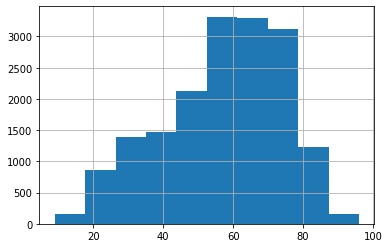

In [28]:
df_fair_play['Aggression'].hist()

In [29]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
df_fair_play[['Value','Aggression','Reactions']] = normalizer.fit_transform(df_fair_play[['Value','Aggression','Reactions']])
df_fair_play.head()

,ID,BP,Value,Aggression,Reactions
0,2,LWB,0.005924,0.724138,0.625000
1,16,CM,0.005687,0.712644,0.569444
2,27,CAM,0.010427,0.689655,0.486111
3,36,ST,0.000000,0.574713,0.430556
4,41,CAM,0.052133,0.563218,0.708333


In [30]:
X=df_fair_play.drop(columns=['BP','Value'])
y=df_fair_play['Value']

In [31]:
from sklearn import linear_model

model = linear_model.LinearRegression()
result = model.fit(X,y)

In [32]:
result.score(X,y)

0.3375898946594992

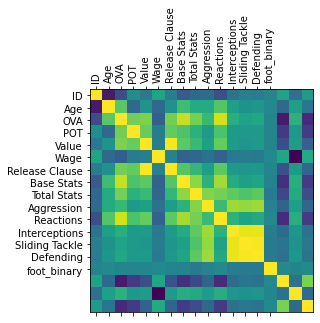

In [33]:
plt.matshow(df_filter.corr())
plt.xticks(range(15),df_filter.corr().columns,rotation=90)
plt.yticks(range(15),df_filter.corr().columns)
plt.show()

In [34]:
df_filter['BP'].value_counts()

CB     3252
ST     2660
CAM    2246
GK     1576
RM     1404
CDM    1246
CM      990
LB      921
RB      894
LM      805
RW      329
LWB     252
RWB     252
LW      209
CF       89
Name: BP, dtype: int64

In [35]:
df_filter.groupby('BP').agg({'Value':'mean'}).sort_values('Value',ascending=False)

#We sort Bp

,Value
BP,
CF,5.453315
LW,4.048158
CM,3.678010
RW,3.373632
CAM,3.107966
CDM,2.834677
LM,2.669776
RWB,2.569544
LWB,2.423929


In [36]:
df_filter.corr()

#we apply the correlation method to have a better understanding 

,ID,Age,OVA,POT,Value,Wage,Release Clause,Base Stats,Total Stats,Aggression,Reactions,Interceptions,Sliding Tackle,Defending,foot_binary,Dummy_units_Value,Dummy_units_Wage,Dummy_units_Release Clause
ID,1.000000,-0.743844,-0.431079,0.042604,-0.094638,0.220066,-0.068069,-0.339341,-0.236634,-0.223598,-0.421033,-0.157559,-0.056243,-0.070775,-0.023207,0.202054,-0.180207,0.158665
Age,-0.743844,1.000000,0.517099,-0.237619,0.095981,-0.229721,0.075386,0.414897,0.280383,0.276063,0.501010,0.192996,0.086021,0.114796,0.024225,-0.237476,0.179632,-0.139315
OVA,-0.431079,0.517099,1.000000,0.592268,0.631679,-0.317022,0.597617,0.832618,0.607676,0.382813,0.870084,0.305286,0.209961,0.248247,-0.016872,-0.739867,0.324762,-0.646735
POT,0.042604,-0.237619,0.592268,1.000000,0.563570,-0.085939,0.549201,0.474763,0.329178,0.139444,0.471139,0.143810,0.129735,0.138748,-0.019600,-0.558436,0.121496,-0.543635
Value,-0.094638,0.095981,0.631679,0.563570,1.000000,-0.063793,0.979295,0.526843,0.393043,0.189843,0.559096,0.150599,0.104354,0.130548,-0.012664,-0.429001,0.160617,-0.287393
Wage,0.220066,-0.229721,-0.317022,-0.085939,-0.063793,1.000000,-0.043901,-0.281725,-0.241888,-0.167896,-0.288465,-0.112646,-0.084992,-0.098021,0.013287,0.230525,-0.877365,0.270352
Release Clause,-0.068069,0.075386,0.597617,0.549201,0.979295,-0.043901,1.000000,0.497094,0.368406,0.178372,0.529609,0.144464,0.102308,0.127223,-0.012689,-0.401227,0.134990,-0.266544
Base Stats,-0.339341,0.414897,0.832618,0.474763,0.526843,-0.281725,0.497094,1.000000,0.678885,0.328163,0.745003,0.278968,0.190729,0.220359,-0.037553,-0.622552,0.289539,-0.541039
Total Stats,-0.236634,0.280383,0.607676,0.329178,0.393043,-0.241888,0.368406,0.678885,1.000000,0.653493,0.604811,0.533069,0.482507,0.525617,-0.100467,-0.480407,0.266867,-0.429608
Aggression,-0.223598,0.276063,0.382813,0.139444,0.189843,-0.167896,0.178372,0.328163,0.653493,1.000000,0.405232,0.732680,0.701287,0.728249,-0.044006,-0.276598,0.167991,-0.243081


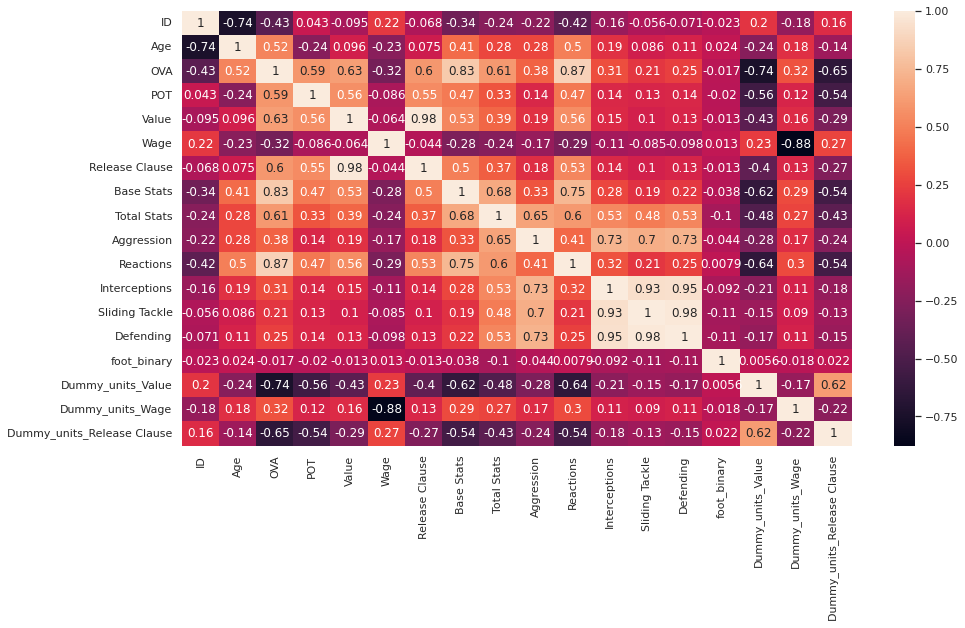

In [37]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_filter.corr(),annot=True, xticklabels = df_filter.corr().columns,yticklabels = df_filter.corr().columns)


#We have created the correlation map to compare the columns that we can select to work our on model. in this case we have
#selected columns that we have isolated the column "Value" against columns that are not correlated each other like  


In [38]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
df_filter[['Value','Aggression','Reactions', 'OVA', 'POT', 'Wage', 'Release Clause', 'Base Stats', 'Total Stats','Age','Defending']] = normalizer.fit_transform(df_filter[['Value','Aggression','Reactions', 'OVA', 'POT', 'Wage', 'Release Clause', 'Base Stats', 'Total Stats','Age','Defending']])
df_filter.head()

#We import the libary sklearn processing to work on our prediction model using the selected columns above in the df_filter 


,ID,Age,OVA,BP,POT,Value,Wage,Release Clause,Base Stats,Total Stats,Aggression,Reactions,Interceptions,Sliding Tackle,Defending,foot_binary,Dummy_units_Value,Dummy_units_Wage,Dummy_units_Release Clause
0,2,0.459459,0.563636,LWB,0.458333,0.005924,0.007368,0.000000,0.666667,0.755836,0.724138,0.625000,69.0,69.0,0.749020,0,1000.0,1000.0,1.0
1,16,0.567568,0.600000,CM,0.500000,0.005687,0.007368,0.005416,0.581481,0.741325,0.712644,0.569444,71.0,40.0,0.533333,1,1000.0,1000.0,1.0
2,27,0.459459,0.600000,CAM,0.500000,0.010427,0.015789,0.000000,0.466667,0.655521,0.689655,0.486111,39.0,30.0,0.321569,1,1.0,1000.0,1.0
3,36,0.540541,0.545455,ST,0.729167,0.000000,0.000000,0.000000,0.522222,0.389274,0.574713,0.430556,70.0,NaN,0.227451,1,1.0,1.0,1.0
4,41,0.540541,0.781818,CAM,0.708333,0.052133,0.012632,0.035451,0.711111,0.809464,0.563218,0.708333,70.0,56.0,0.643137,1,1.0,1000.0,1.0


In [39]:
X0=df_filter[['Release Clause']]
y0=df_filter['Value']

#we create our first bulk of X/Y comparaison between the "Release Clause" and "Value"

X1=df_filter[['OVA']]
y1=df_filter['Value']

#we create our first bulk of X/Y comparaison between the "Overall score (OVA)" and "Value" to see how it can 
#see how the OVA impact the overall value of the player. 

X2=df_filter[['POT']]
y2=df_filter['Value']

#we create our first bulk of X/Y comparaison between the "Pot" potencial and "Value" to see how it can 
#see how the OVA impact the overall value of the player. 

X3=df_filter[['Base Stats']]
y3=df_filter['Value']

#we create our first bulk of X/Y comparaison between the "Base stats" potencial and "Value" to see how it can 
#see how the OVA impact the overall value of the player. 

X4=df_filter[['Reactions']]
y4=df_filter['Value']

#We create our first bulk of X/Y comparaison between the "Reactions" potencial and "Value" to see how it can 
#see how the OVA impact the overall value of the player. 


In [40]:
from sklearn import linear_model

model = linear_model.LinearRegression()
result0 = model.fit(X0,y0)
result1 = model.fit(X1,y1)
result2 = model.fit(X2,y2)
result3 = model.fit(X3,y3)
result4 = model.fit(X4,y4)

#We import the linear model regression to start Kick-off our analysis and get interesting insight between the 5 models 
#we have created. 


In [41]:
display(result0.score(X0,y0))
display(result1.score(X1,y1))
display(result2.score(X2,y2))
display(result3.score(X3,y3))
display(result4.score(X4,y4))


-4.93349122030125

0.3893980448264657

0.31499692812333757

0.21555017980667968

0.31258871806520994

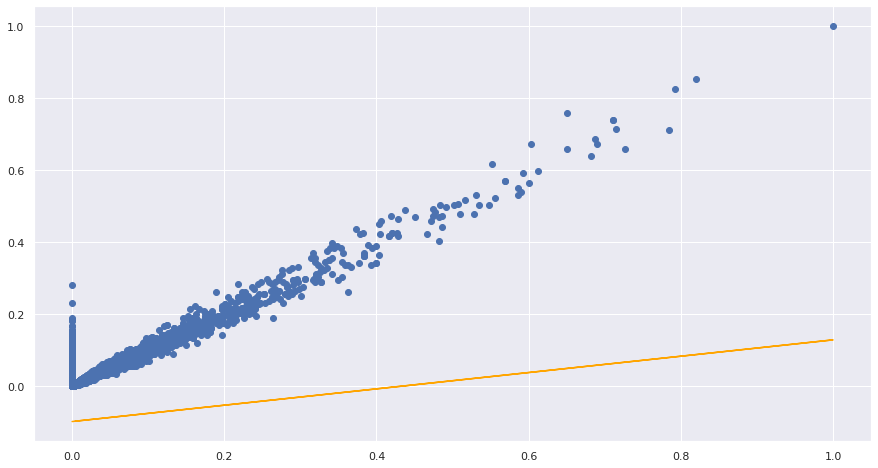

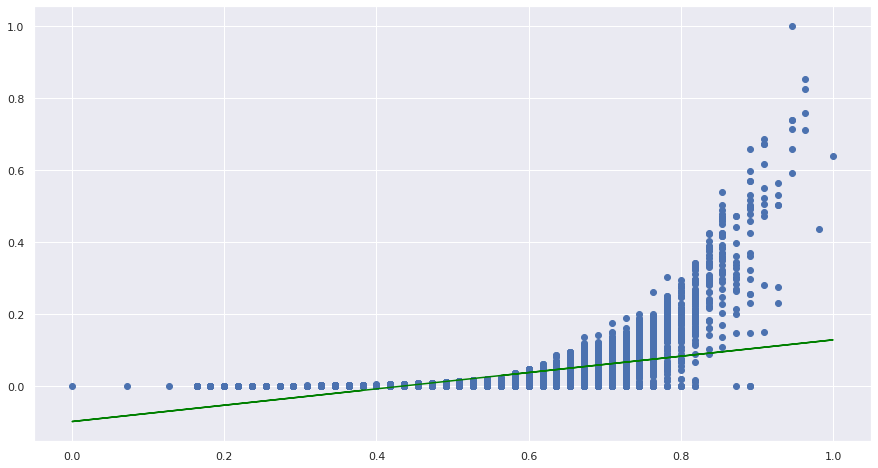

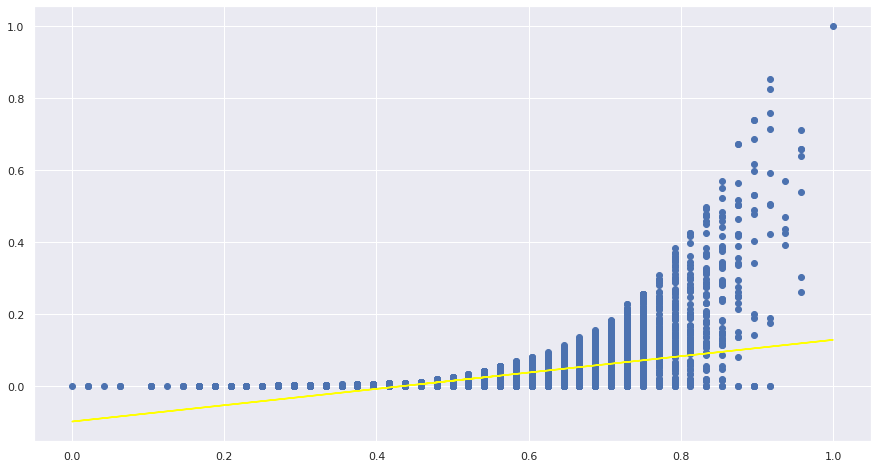

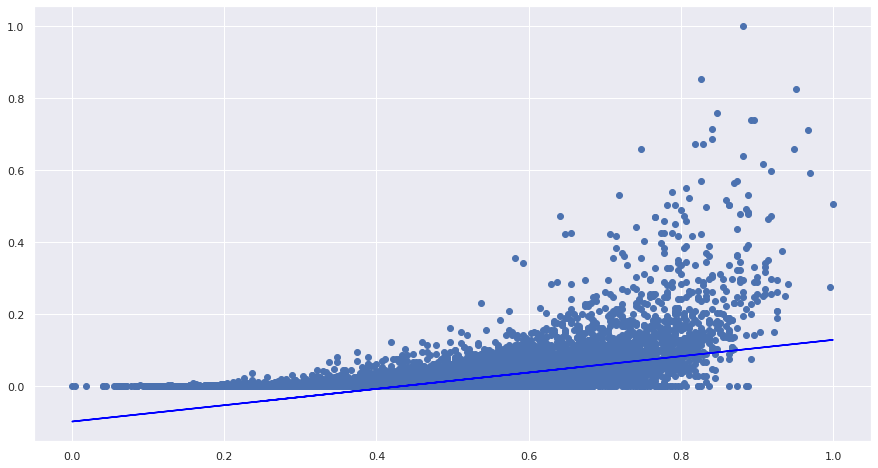

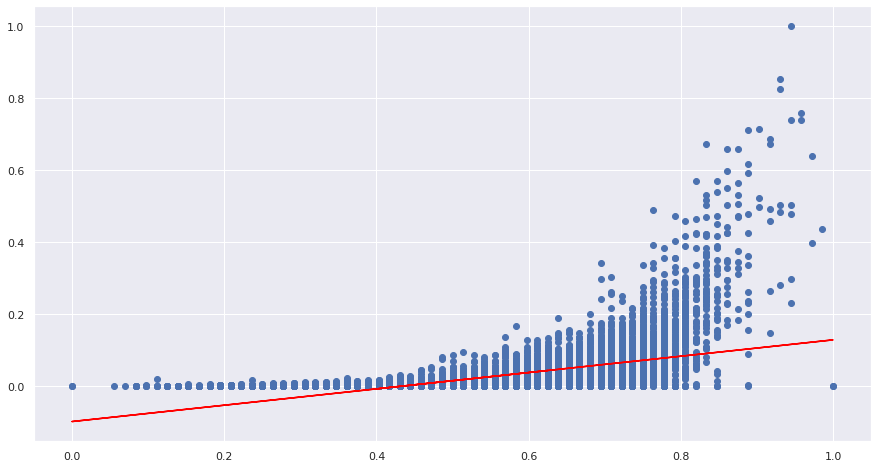

In [43]:
regression_line0 = result0.intercept_ + result0.coef_[0]*X0
plt.plot(X0, regression_line0, c = 'orange')
plt.scatter(X0,y0)
plt.show()

#We create our first linear regression to check the "Release Clause" and "Value". 

regression_line1 = result1.intercept_ + result1.coef_[0]*X1
plt.plot(X1, regression_line1, c = 'green')
plt.scatter(X1,y1)
plt.show()

#We create our first linear regression to check the "Overall score (OVA)" and "Value"

regression_line2 = result2.intercept_ + result2.coef_[0]*X2
plt.plot(X2, regression_line2, c = 'yellow')
plt.scatter(X2,y2)
plt.show()

#We create our first linear regression to check the "Pot" potencial and "Value"

regression_line3 = result3.intercept_ + result3.coef_[0]*X3
plt.plot(X3, regression_line3, c = 'blue')
plt.scatter(X3,y3)
plt.show()


#We create our first linear regression to check the "Base stat" potencial and "Value"


regression_line4 = result4.intercept_ + result4.coef_[0]*X4
plt.plot(X4, regression_line4, c = 'red')
plt.scatter(X4,y4)
plt.show()

#We create our first linear regression to check the "Reactions" potencial and "Value"

## Analyzing aggresive related dimensions

Going through values of Aggresion, Interceptions, Sliding Tackle of defenders and non defenders to understand to fair_play distribution of the dataset and how correlated these values are with the market value. 

In [44]:
df_fair_play = df[['ID','Name','Age','Club','Nationality','BP','Value','Aggression','Interceptions','Sliding Tackle','Defending']]
df_fair_play['Value']= df_fair_play['Value'].str.replace('[K,k,M,m, €]','')
df_fair_play["Dummy_units_Value"] = df_fair_play["Value"].apply(units)
df_fair_play["Dummy_units_Value"] = df_fair_play["Dummy_units_Value"].astype(float)
df_fair_play['Value'] = df_fair_play['Value'].astype(float)
df_fair_play['Value'] = df_fair_play['Value'] / df_fair_play['Dummy_units_Value']
df_fair_play.sample(5)

,ID,Name,Age,Club,Nationality,BP,Value,Aggression,Interceptions,Sliding Tackle,Defending,Dummy_units_Value
10980,237916,W. Smallbone,20,Southampton,Republic of Ireland,CAM,1.2,46,56.0,50.0,166,1.0
12244,242159,Ricardo Friedrich,27,MKE Ankaragücü,Brazil,GK,450.0,28,12.0,15.0,56,1.0
14867,252032,M. Mbaye,22,FC Porto,Senegal,GK,525.0,22,16.0,11.0,36,1.0
11075,238236,O. Brynhildsen,21,Molde FK,Norway,RM,1.4,60,45.0,52.0,131,1.0
12226,242085,M. Virtue,23,Blackpool,England,CM,450.0,67,58.0,62.0,181,1.0


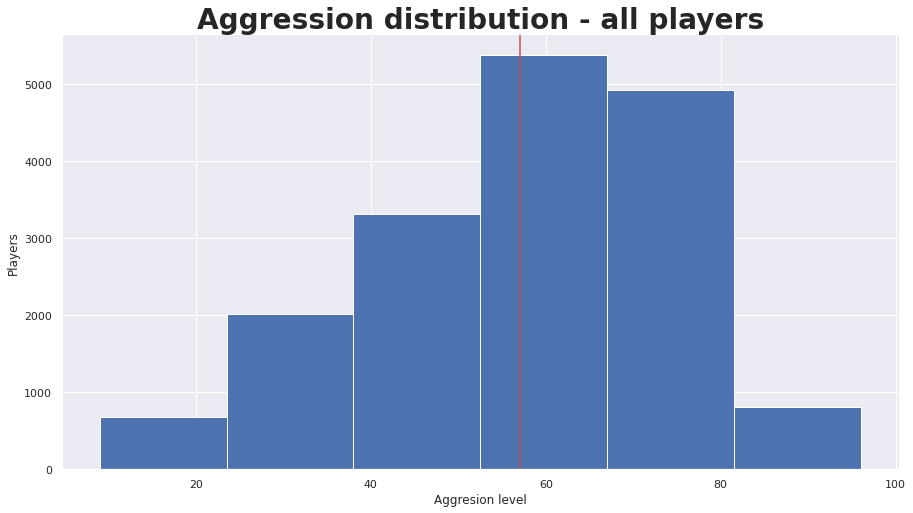

In [45]:
plt.hist(df_fair_play['Aggression'], bins =6)
plt.axvline(x = np.mean(df_fair_play['Aggression']), color = 'r', label = 'mean')
plt.title('Aggression distribution - all players',fontsize=28,fontweight="bold")
plt.ylabel("Players")
plt.xlabel("Aggresion level")
plt.show()

In [46]:
df_fair_play.groupby('BP').agg({'Aggression':'sum','Defending':'sum'}).sort_values('Aggression',ascending=False).head()

# Center Back (CB) - Defender 
# Striker (ST) - Attacker 
# Central Attacking Midfielders (CAM) - Attacker 
# Central Defensive Midfielders (CDM) - Hybrid position

,Aggression,Defending
BP,,
CB,222603,650649
ST,145826,210010
CAM,118054,290192
CDM,89154,248705
RM,71840,164688


In [47]:
#What would happen if we filter only the Center back players for the same analysis? 

df_fair_cb = df_fair_play[(df_fair_play['BP'] == 'CB')]
df_fair_cb.head()

,ID,Name,Age,Club,Nationality,BP,Value,Aggression,Interceptions,Sliding Tackle,Defending,Dummy_units_Value
8,244,G. Neville B,35,Manchester United,England,CB,0.0,87,85.0,83.0,242,1.0
10,249,P. Neville,35,Everton,England,CB,120.0,78,83.0,72.0,224,1.0
13,388,S. Campbell,35,Newcastle United,England,CB,0.0,84,77.0,73.0,222,1.0
15,496,D. Hamann,36,Milton Keynes Dons,Germany,CB,0.0,74,75.0,56.0,198,1.0
24,1088,A. Nesta,37,Montreal Impact,Italy,CB,0.0,67,76.0,70.0,221,1.0


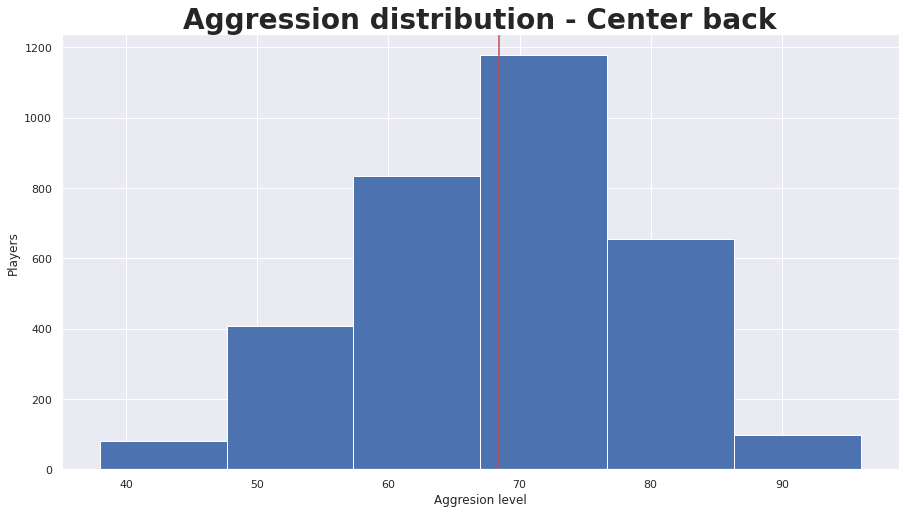

In [48]:
# The average aggresion level goes up to almost 70 if we only filter these center back defenders.

plt.hist(df_fair_cb['Aggression'], bins =6)
plt.axvline(x = np.mean(df_fair_cb['Aggression']), color = 'r', label = 'mean')
plt.title('Aggression distribution - Center back',fontsize=28,fontweight="bold")
plt.ylabel("Players")
plt.xlabel("Aggresion level")
plt.show()

In [50]:
# Is experience related to level of aggresion in defenders? 
df_fair_cb.groupby(['Age']).agg({'Aggression':'mean','Defending':'mean'}).sort_values(['Aggression','Defending'],ascending=False).head()
# On average, the most experienced defenders are above the average of aggression level

,Aggression,Defending
Age,,
35,76.907895,213.671053
39,76.875000,207.250000
34,75.621053,207.652632
42,75.000000,239.000000
33,74.685039,209.393701


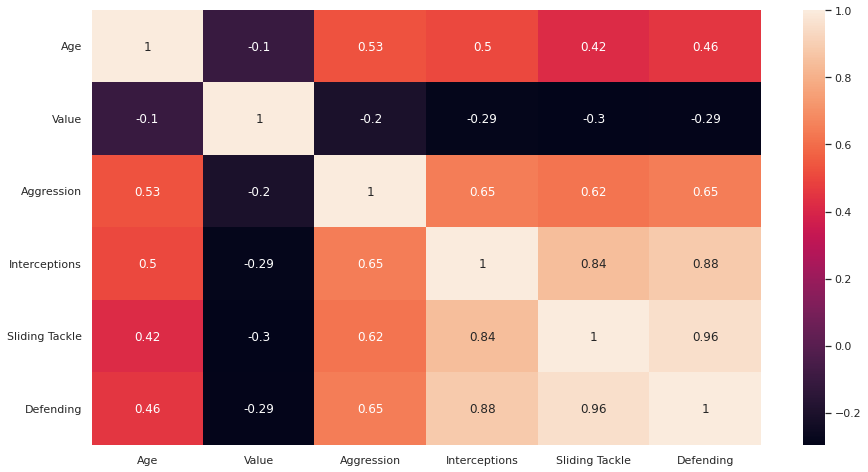

In [51]:
#Does age help us to predict aggression of a player? 

df_fair_cb_corr = df_fair_cb.drop(columns=['ID','Dummy_units_Value'])

sns.heatmap(df_fair_cb_corr.corr(),annot=True, xticklabels = df_fair_cb_corr.corr().columns,yticklabels = df_fair_cb_corr.corr().columns)

# Interceptions are very correlated with tackles because they are grouped on the same type of situation.
# Aggression is not neccesarily a condition to be good at interceptions but it can help on this metric.
# Aggression & Age is the best option for a model because it has almost no corr with other metrics but an interesting corr with aggression.

In [ ]:
normalizer = MinMaxScaler()

df_fair_cb[['Aggression','Age']] = normalizer.fit_transform(df_fair_cb[['Aggression','Age']])

X_cb=df_fair_cb[['Age']]
y_cb=df_fair_cb['Aggression']

model_cb = linear_model.LinearRegression()
result_cb = model.fit(X_cb,y_cb)

display(result_cb.score(X_cb,y_cb))

regression_line_cb = result_cb.intercept_ + result_cb.coef_[0]*X_cb
plt.plot(X_cb, regression_line_cb, c = 'orange')
plt.scatter(X_cb,y_cb)
plt.show()

#Despite the correlation between Age & Aggression in central back defenders, we can't rely on this value to predict the aggression of a player as the times goes by.

## Analyzing how defending impacts on aggression 

Are defenders aggressive by default? 
Can we use Defending skills as a parameter to see how the aggression level will be?

In [53]:
# Who are the top 10 most agressive defenders on the dataset?
# Are the most aggressive players good at defending?
df_fair_cb.groupby(['Name']).agg({'Aggression':'mean','Defending':'mean'}).sort_values(['Aggression','Defending'],ascending=False).head(10)

,Aggression,Defending
Name,,
K. Gjasula,1.000000,200.0
P. García,0.965517,214.0
D. Erdmann,0.965517,190.0
S. Kolašinac,0.948276,227.0
A. Méndez,0.948276,208.0
J. Van Damme,0.948276,207.0
Rúben Dias,0.931034,248.0
Felipe Melo,0.931034,231.0
C. Tioté,0.931034,230.0


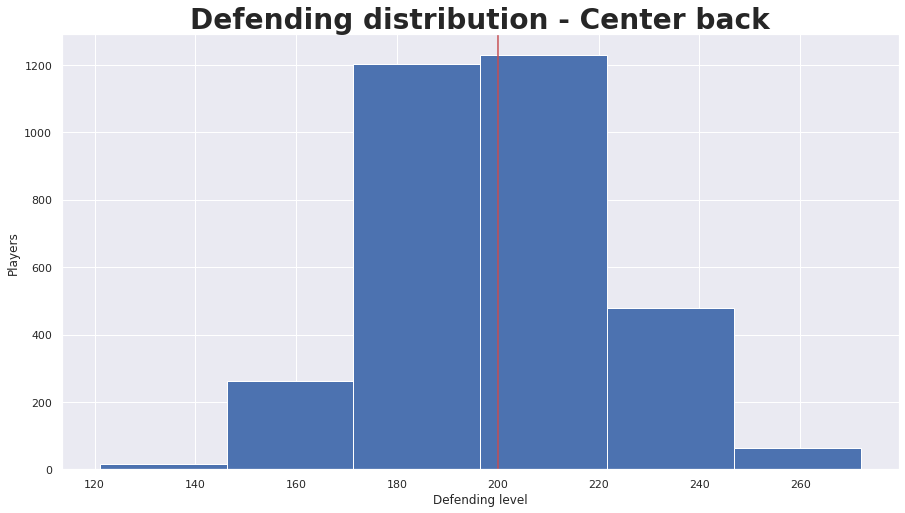

In [54]:
# The Defending average of the CBs defenders is 200

plt.hist(df_fair_cb['Defending'], bins =6)
plt.axvline(x = np.mean(df_fair_cb['Defending']), color = 'r', label = 'mean')
plt.title('Defending distribution - Center back',fontsize=28,fontweight="bold")
plt.ylabel("Players")
plt.xlabel("Defending level")
plt.show()

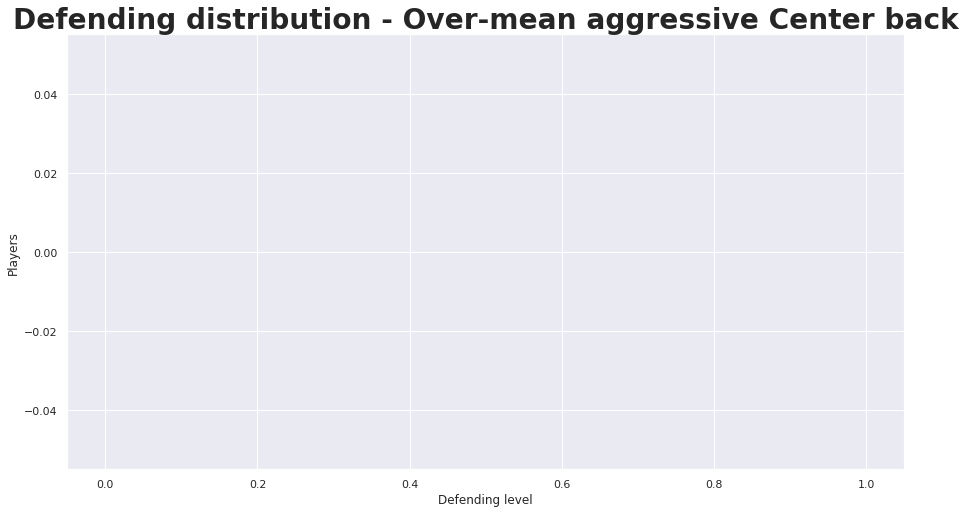

In [55]:
# Let's isolate the most aggressive players to go further on Defending skills

df_fair_cb_aggressive = df_fair_cb[df_fair_cb['Aggression'] > 70]

plt.hist(df_fair_cb_aggressive['Defending'], bins =6)
plt.axvline(x = np.mean(df_fair_cb_aggressive['Defending']), color = 'r', label = 'mean')
plt.title('Defending distribution - Over-mean aggressive Center back',fontsize=28,fontweight="bold")
plt.ylabel("Players")
plt.xlabel("Defending level")
plt.show() 

In [56]:
# For the most aggressive players, the defending average level goes up, and also the experience starts to go up as well
df_fair_cb_aggressive.groupby(['Age']).agg({'Aggression':'mean','Defending':'mean'}).sort_values(['Aggression','Defending'],ascending=False).head()

,Aggression,Defending
Age,,


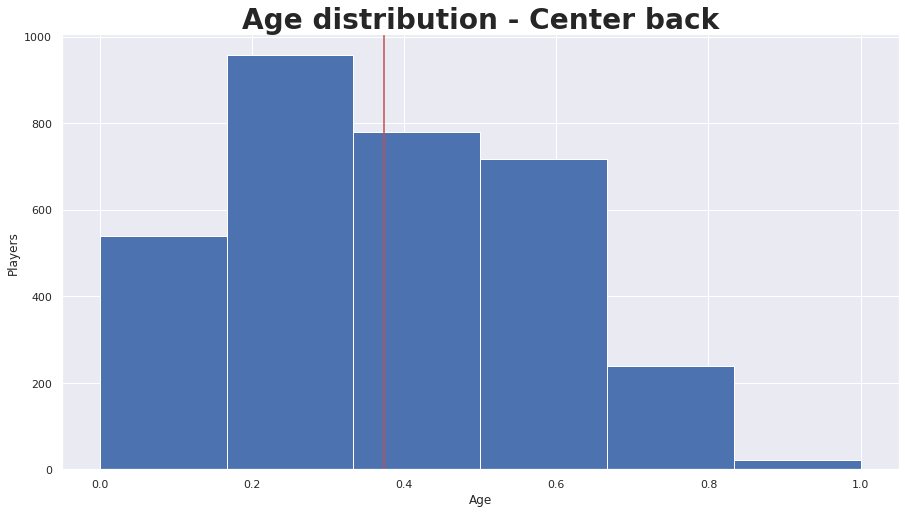

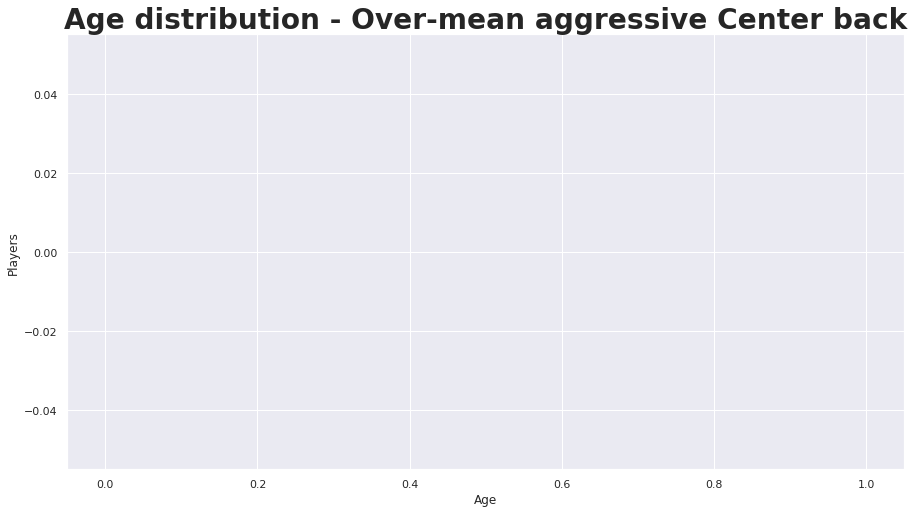

On a general overview, average CBs age is near 25 years.
When we filter over average aggressive players, average CBs age goes up by near 30 years.


In [57]:
# Check for Age on most aggressive defenders

plt.hist(df_fair_cb['Age'], bins =6)
plt.axvline(x = np.mean(df_fair_cb['Age']), color = 'r', label = 'mean')
plt.title('Age distribution - Center back',fontsize=28,fontweight="bold")
plt.ylabel("Players")
plt.xlabel("Age")
plt.show()


df_fair_cb_aggressive = df_fair_cb[df_fair_cb['Aggression'] > 70]

plt.hist(df_fair_cb_aggressive['Age'], bins =6)
plt.axvline(x = np.mean(df_fair_cb_aggressive['Age']), color = 'r', label = 'mean')
plt.title('Age distribution - Over-mean aggressive Center back',fontsize=28,fontweight="bold")
plt.ylabel("Players")
plt.xlabel("Age")
plt.show() 

print("On a general overview, average CBs age is near 25 years.")
print("When we filter over average aggressive players, average CBs age goes up by near 30 years.")

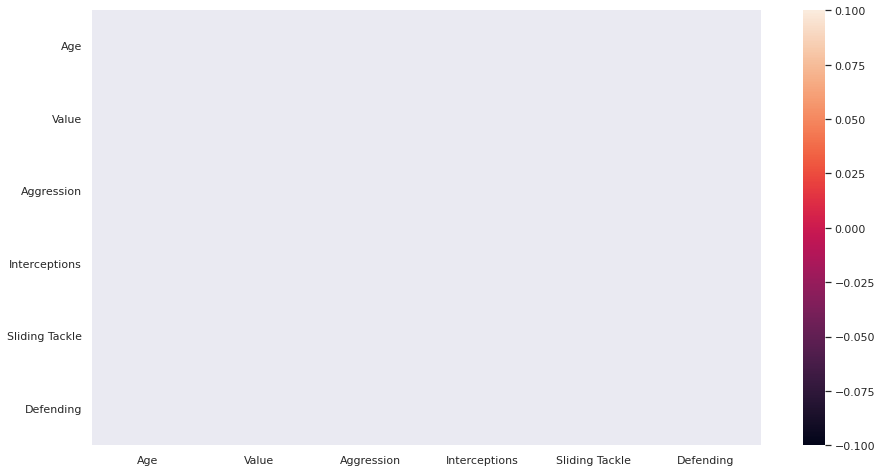

In [58]:
df_fair_cb_aggressive_corr = df_fair_cb_aggressive.drop(columns=['ID','Dummy_units_Value'])

sns.heatmap(df_fair_cb_aggressive_corr.corr(),annot=True, xticklabels = df_fair_cb_aggressive_corr.corr().columns,yticklabels = df_fair_cb_aggressive_corr.corr().columns)

# Despite our previous hypothesis, aggression level of the most aggressive defenders is not a parameter to predict the level of defending

# Analyzing how 'Base Stats' impacts on 'Value'
Are the footballers with the best statistics better valued?


In [81]:
df_stats = df[['ID','Name','Base Stats','Value']]
df_stats['Value']= df_stats['Value'].str.replace('[K,k,M,m, €]','')
df_stats["Dummy_units_Value"] = df_stats["Value"].apply(units)
df_stats["Dummy_units_Value"] = df_stats["Dummy_units_Value"].astype(float)
df_stats['Value'] = df_stats['Value'].astype(float)
df_stats['Value'] = df_stats['Value'] / df_stats['Dummy_units_Value']
df_stats.sample(5)

,ID,Name,Base Stats,Value,Dummy_units_Value
11410,239540,E. Toal,277,325.0,1.0
7926,225653,G. Kerk,409,9.0,1.0
3641,200223,A. Maher,416,7.5,1.0
8023,225997,B. Verbič,423,12.0,1.0
6827,220314,O. Marciano,374,600.0,1.0


In [82]:
df_stats.drop(df_stats.loc[df_stats['Value']==0].index, inplace=True)

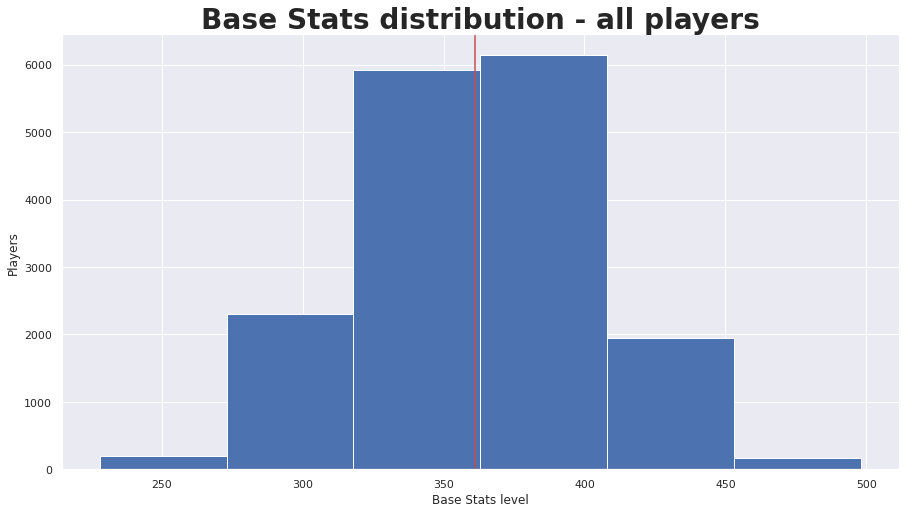

In [83]:
plt.hist(df_stats['Base Stats'], bins =6)
plt.axvline(x = np.mean(df_stats['Base Stats']), color = 'r', label = 'mean')
plt.title('Base Stats distribution - all players',fontsize=28,fontweight="bold")
plt.ylabel("Players")
plt.xlabel("Base Stats level")
plt.show()

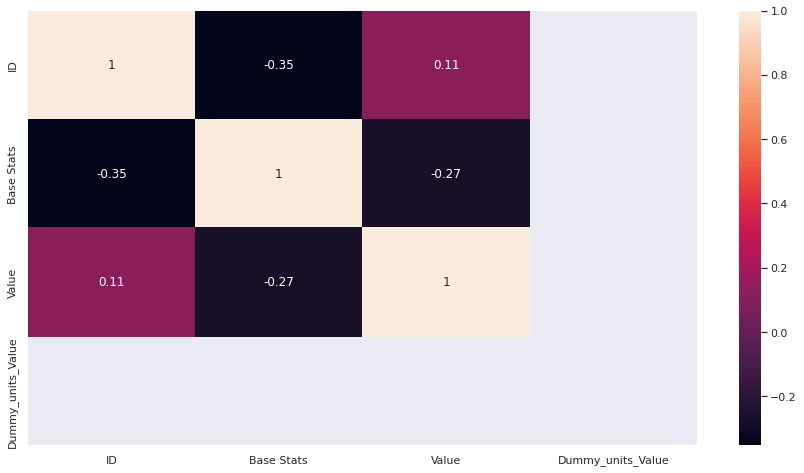

In [84]:
sns.heatmap(df_stats.corr(),annot=True, xticklabels = df_stats.corr().columns,yticklabels = df_stats.corr().columns)

0.07050575169467466

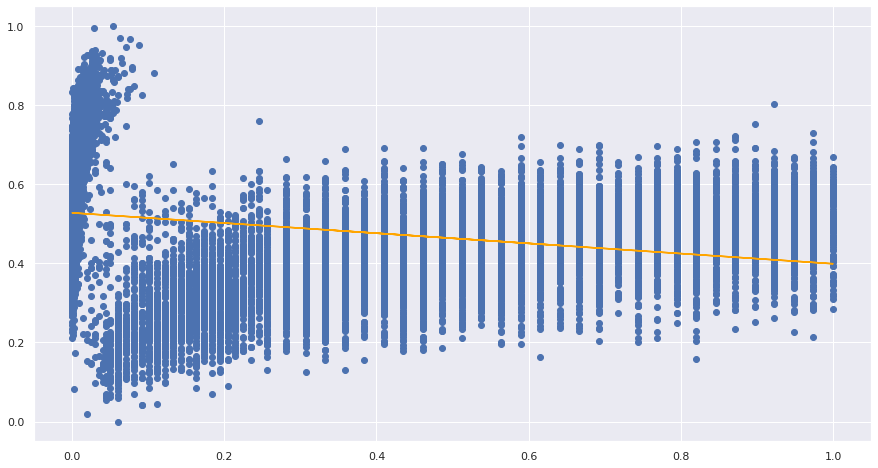

In [71]:
normalizer = MinMaxScaler()

df_stats[['Value','Base Stats']] = normalizer.fit_transform(df_stats[['Base Stats','Value']])

X_stats=df_stats[['Base Stats']]
y_stats=df_stats['Value']

model_stats = linear_model.LinearRegression()
result_stats = model.fit(X_stats,y_stats)

display(result_stats.score(X_stats,y_stats))

regression_line_stats = result_stats.intercept_ + result_stats.coef_[0]*X_stats
plt.plot(X_stats, regression_line_stats, c = 'orange')
plt.scatter(X_stats,y_stats)
plt.show()

# Predict a player's 'Value' based on their 'Base Stats'

In [74]:
X_stats = int(input("Introduce the Base Stats of your player (a number between: 0-500)"))

Introduce the Base Stats of your player (a number between: 0-500)490


In [75]:
print(f"The player with this stats: {X_stats} could worth: {result_stats.intercept_ + result_stats.coef_[0]*X_stats}")

The player with this stats: 490 could worth: -62.583697364902754
